<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سرشاخ با رگرسیون
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
در تمامی پلات‌های خواسته شده در این تمرین، نام‌گذاری بردار‌ها الزامی است.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین می‌خواهیم اصول عملکرد رگرسیون خطی را به دو روش <b>الگوریتم گرادیان کاهشی (Gradient Descent)</b> و <b>معادلات نرمال (Normal Equation)</b>  درک کنیم. همچنین سعی شده در خلال تمرین مفاهیمی از قبیل تاثیر نرمال‌سازی داده‌ها در روند یادگیری ماشین، نرخ‌یادگیری در الگوریتم گرادیان کاهشی، رگولاریزیشن/منظم‌سازی (Regularization)، موازنه‌ی بایاس واریانس و غیره را مطرح و در رابطه با آن‌ها بحث کنیم. برای شروع این تمرین هیجان‌انگیز با اجرای سل زیر کتابخانه‌های لازم را فراخوانده و داده را از فایل <code>Housing.csv</code> بخوانید و در متغیر <code>df</code> ذخیره نمایید. 
</font>
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Housing.csv')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با بررسی سطر‌های تکراری یا داده‌های مفقوده متوجه‌ می‌شویم داده‌های نسبتاً تمیزی در اختیارمان قرار گرفته است و در این تمرین چندان درگیر پیش‌پردازش داده نمی‌شویم. ستون اول از دیتافریم را به‌عنوان هدف مسئله رگرسیون خطی پیش‌رو انتخاب کنید و در متغیر <code>y</code> و 
ستون دوم دیتافریم که بیان‌گر مساحت خانه‌ است را در بخش اول سوال به عنوان تنها ورودی مسئله در متغیر <code>x</code> ذخیره کنید.
</font>
</p>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.iloc[:, 0: 2].duplicated().sum()

13

In [5]:
x = df['area'].to_numpy()
y = df['price'].to_numpy()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از آن‌جا که حدود متغیر‌های <code>x</code> و <code>y</code> بسیار زیاد است، 
هر دو متغیر را بر <code>۱۰۰۰۰</code> تقسیم کنید اما در تحلیل‌ نتایج این موضوع را فراموش نکنید (فعلاً نمی‌خواهیم از نرما‌ل‌سازی یا استانداردسازی داده‌ها استفاده کنیم).
</font>
</p>


In [6]:
x = x / 10000
y = y / 10000

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به این‌که در رگرسیون خطی یک عرض از مبدا برای خط رگرسور تعریف می‌شود، برای انجام ضرب ماتریسی میان ماتریس ورودی و بردار ضرایب رگرسیون یک ستون با مقدار <code>1</code> به <code>x</code> اضافه کرده و در متغیر <code>X</code> ذخیره نمایید. پیشنهاد می‌شود <code>y</code> و <code>X</code> را جهت تسریع محاسبات آتی به آرایه‌های نامپای تبدیل کنید (<code>Shape</code> آرایه‌های <code>X</code> و <code>y</code> به‌صورت کامنت‌ آمده است).
</font>
</p>


In [7]:
x = np.concatenate((np.ones(len(x)).reshape(-1,1), x.reshape(-1,1)), axis= 1)
y = y.reshape(-1,1)
# X.shape = (545, 2)
# y.shape= (545, 1)

In [8]:
x.shape

(545, 2)

In [9]:
y.shape

(545, 1)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اسکترپلات <code>x</code> و <code>y</code> را رسم نمایید تا نحوه‌ی توزیع نقاط در این صفحه را مشاهده کنید.
</font>
</p>


Text(0, 0.5, 'y(price in /10000 scale)')

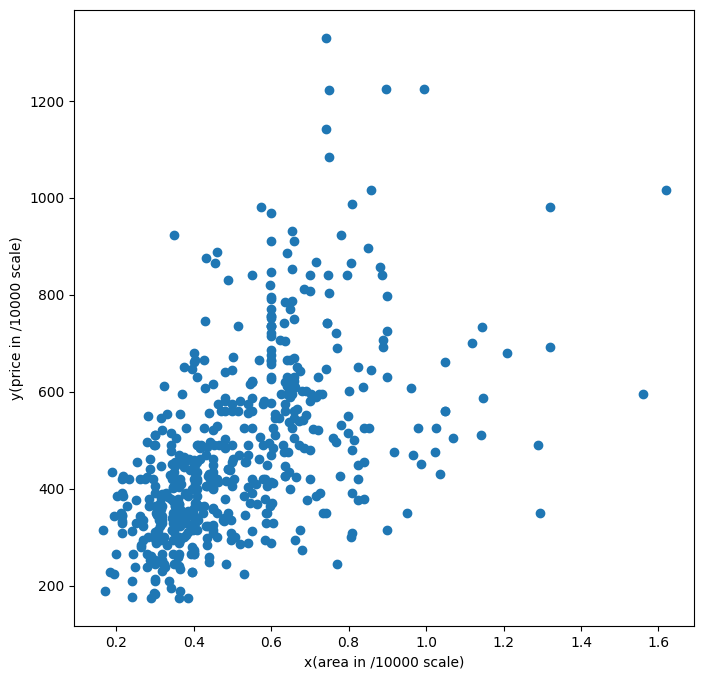

In [10]:
ax = plt.subplots(figsize= (8,8))
plt.scatter(x[:, 1], y[:, 0])
plt.xlabel('x(area in /10000 scale)')
plt.ylabel('y(price in /10000 scale)')

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش اول: رگرسیون تک‌متغیره
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم مسئله رگرسیون خطی برای پیش‌بینی مقدار قیمت خانه با استفاده از مساحت‌ خانه را نخست به روش گرادیان کاهشی، سپس با استفاده از معادلات نرمال حل کنیم. بدین منظور از شما می‌خواهیم تمامی توابع لازم را خودتان بنویسید و در پایان نتایج را با نتایج دستور رگرسیون خطی پکیج <code>scikit-learn</code> مقایسه خواهیم کرد.
<br>
رگرسیون خطی برای حالت تک متغیره:
</font>
</p>


تخمین‌گر خطی: 
$ h_\theta (x) = \theta_0 + \theta_1 x $

ضرایب رگرسیون: 
$\theta_0 $, $\theta_1$

$m$ = تعداد نمونه‌های یادگیری <br><br>
$n$ = تعداد ویژگی‌ها (در حالت تک متغیره برابر ۱ است) <br><br>
$\alpha$ = نرخ یادگیری


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هدف مسئله کمینه کردن تابع هزینه‌ J است. در مسئله‌ی رگرسیون خطی تک متغیره تابع هزینه به شکل زیر تعریف می‌شود: 
</font>
</p>

$$J(\theta_0, \theta_1) = \frac{1}{(2m)}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)^{2}$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
که در آن رگرسور به شکل زیر تعریف شده است:
</font>
</p>

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
الگوریتم گرادیان کاهشی
</font>
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در هر گام این الگوریتم نخست مشتق تابع هزینه محاسبه شده و به وسیله‌‌ی آن ضرایب رگرسیون مطابق فرمول زیر به‌روزرسانی می‌شوند. این عمل تا همگرایی الگوریتم ادامه پیدا می‌کند.

</font>
</p>

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr)$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>که در آن برای j=0:
</font>
</p>


$$\frac{\partial}{\partial \theta_0} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{m}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> و برای j های مخالف صفر:
</font>
</p>

   
$$\frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{m}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)x^{(i)}$$




<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در گام اول از شما می‌خواهیم تابعی برای محاسبه مقدار تابع هزینه‌ بنویسید.
ورودی‌های این تابع به ترتیب ماتریس <code>X</code>، بردار <code>y</code> و ضرایب theta هستند و خروجی این تابع مقدار تابع هزینه است.
در  نوشتن این تابع دقت داشته باشید که در این بخش رگرسیون تنها با یک متغیر ورودی صورت می‌گیرد اما در ادامه‌ی تمرین‌ قصد داریم رگرسیون چند متغیره را انجام دهیم و تابعی که در این مرحله می‌نویسید چنا‌نچه قابلیت تعمیم داشته باشد می‌تواند در بخش‌های بعد هم استفاده شود. برای راهنمایی <code>Shape</code> ورودی‌ها و خروجی تابع به ازای <code>X</code> و <code>y</code> که در بخش مقدمه ساخته‌اید و ضرایب رگرسیون در حالت تک متغیره به‌صورت کامنت در سل زیر نوشته شده است.
</font>
</p>


In [11]:
# X.shape = (545, 2)
# y.shape= (545, 1)
# theta_gd.shape = (2, 1)
# computeCost(X,y,theta_gd) = a float number

def computeCost(X, y, theta_gd):
    J = (1 / (2 * len(x))) * np.sum(x * theta_gd) 
    return(J)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال برای ضرایب رگرسیون مقدار اولیه صفر را در نظر گرفته و مقدار تابع هزینه را به ازای آن محاسبه نمایید.
</font>
</p>


In [12]:
# J_initial = TO-DO
computeCost(x, y, np.array([0,0]))

0.0

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون با استفاده از تابع <code>computeCost</code> نوشته شده تابعی به نام <code>gradientDescent</code> بنویسید تا الگوریتم گرادیان کاهشی را  پیاده کند.
ورودی‌های این تابع ماتریس ورودی <code>X</code>، بردار هدف <code>y</code>، ضرایب رگرسیون اولیه، نرخ یادگیری و تعداد گام اجرای الگوریتم است و در خروجی به ترتیب ضرایب رگرسیون نهایی، تاریخچه تغییرات تابع هزینه و تاریخچه تغییرات ضرایب رگرسیون در طول فرآیند اجرای تابع  <code>gradientDescent</code> را خواهیم داشت.  برای راهنمایی ابعاد خروجی‌های تابع در حالت قبل و به ازای ۲۰۰ گام اجرای تابع به‌صورت کامنت آورده شده است.
</font>
</p>


In [13]:

def gradientDescent(X, y, theta_gd, alpha, num_iters):
    J_history = []
    theta_gd_history = []
    for i in range(num_iters):
        h0 = x * theta_gd
        theta_gd[0] += -alpha * (1 / len(x)) * np.sum(h0 - y)
        theta_gd[1] += -alpha (1 / len(x)) * np.sum((h0 - y) * x[:1])
        theta_gd_history.append(theta_gd)
        J_history.append(computeCost(x, y, theta_gd))
    
           
    return(theta_gd, J_history, theta_gd_history) 


#inputs:
# X.shape = (545, 2)
# y.shape= (545, 1)
# theta_gd.shape = (2, 1)
# alpha = a float number
# num_iters = 200
#outputs:
# theta_gd.shape = (2, 1)
# J_history.shape= (200,)
# theta_gd_history.shape = (2, 200)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون الگوریتم گرادیان کاهشی را با توجه به تابعی که نوشته‌اید با ضرایب رگرسیون اولیه <code>0</code>، نرخ یادگیری <code>1</code> و به تعداد <code>10000</code> گام اجرا کنید و مقدار ضرایب رگرسیون نهایی و کمینه مقدار تابع هزینه را گزارش دهید.
</font>
</p>


In [ ]:
# TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار تغییرات ضرایب رگرسیون طی گام‌های اجرای الگوریتم فوق را رسم نمایید. 
</font>
</p>


In [ ]:
# TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار تغییرات مقدار تابع هزینه طی <code>1000</code> گام نخست را رسم کنید.</font>
</p>



In [ ]:
# TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
رسم نمودار سه‌بعدی مقدار تابع هزینه بر حسب مقادیر مختلف ضرایب رگرسیون حول نقطه کمینه به‌دست‌آمده طی اجرای الگوریتم به درک بهتر آن کمک شایانی می‌کند. بدین منظور دو گزینه پیش روی شما قرار می‌گیرد. انتخاب اول شما این است که در صفحه با محور‌های theta_0، theta_1  فضا را حول ضرایب رگرسیون نهایی مشبک کنید و مقدار J را در تمام این نقاط محاسبه کنید. حال در تصویر سه‌بعدی شما بردار اول theta_0، بردار دوم theta_1 و بردار سوم J خواهد بود و مقادیر تابع هزینه حول نقطه‌ی کمینه در تصویر سه‌بعدی قابل مشاهده خواهد بود. گزینه‌ دومی که پیش‌روی شما قرار می‌گیرد دارای نمره امتیازی است. در این حالت به جای تصویر سه‌بعدی ثابت توضیح داده شده از شما می‌خواهیم تصویر تعاملی رسم کنید که قابلیت بزرگ‌نمایی و چرخش داشته باشد و سپس مسیر تغییرات ضرایب رگرسیون از مقدار اولیه داده شده تا رسیدن به نقطه بهینه در الگوریتم گرادیان کاهشی که پیاده کرده‌اید را بر روی تصویر سه‌بعدی رسم کنید. پیشنهاد می‌شود از ماژول <code>graph_objects</code> پکیج <code>plotly</code> استفاده کنید. در هر دو حالت نحوه تعریف کردن <code>grid</code> بر روی مقادیر ضرایب رگرسیون و حدود تصویر باید به نحوی باشد که خروجی واضح و قابل تفسیر باشد.
</font>
</p>



In [ ]:
import plotly.graph_objects as go
# TO-DO

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معادلات نرمال
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌خواهیم مسئله‌ی رگرسیون خطی را با استفاده از معادلات نرمال حل کنیم. از مزایای این روش این است که نیاز به نرمال‌سازی یا استانداردسازی داده‌ها ندارد. همچنین برای رسیدن به نقطه بهینه نیاز به استفاده از حلقه نیست. از معایب آن هم می‌توان به دشواری محاسبه ماتریس معکوس در ابعاد بالا و نیاز به مدیریت ماتریس <code dir=ltr>(X^T.X)</code> در صورت معکوس‌پذیر نبودن اشاره کرد. ضرایب رگرسیون در این روش با فرمول زیر محاسبه می‌شوند:
</font>
</p>

$$\theta  = \big(X^TX\Big)^{-1}X^Ty$$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تابعی بنویسید که به‌صورت مستقیم (به روش معادلات نرمال) ضرایب رگرسیون را محاسبه کند. ورودی این تابع   ماتریس <code>X</code> و بردار <code>y</code> و خروجی آن ضرایب رگرسیون خطی است.</font>
</p>



In [ ]:
def normalEqn(X, y):
    # TO-DO
    return theta

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  با استفاده از تابع <code>normalEqn</code> مجددا رگرسیون خطی را انجام دهید و ضرایب رگرسیون و کمینه تابع هزینه را گزارش دهید. 
</font>
</p>

In [ ]:
# TO-DO

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کتابخانه‌ی <code>scikit-learn</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">

<font face="vazir" size=3>
بالاخره زمان فراخوانی پکیج <code>sklearn</code>  فرا رسیده است. با استفاده از این پکیج رگرسیون خطی را انجام داده و مقادیر ضرایب رگرسیون و مقدار کمینه تابع هزینه را گزارش دهید.  
</font>
</p>



In [ ]:
from sklearn.linear_model import LinearRegression 
# TO-DO

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
معیار‌های ارزیابی متفاوتی برای مسائل رگرسیون وجود دارد. میانگین مربعات خطا (MSE)، میانگین اندازه خطا (MAE)، میزان همبستگی (correlation) و معیار R2‌ از جمله مهم‌ترین این معیارها هستند.
پیشنهاد می‌شود برای اطلاعات بیش‌تر به <a href="https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6519016-evaluate-the-performance-of-a-regression-model" target="_blank">این لینک</a>
مراجعه کنید.
تابع محاسبه معیار R2 ‌بر اساس خروجی به‌دست‌آمده از رگرسیون خطی و خروجی حقیقی را بنویسید. 

</font>
</p>

$$ R^2 = 1 - \left(\frac{SS_{\text{Residual}}}{SS_{\text{Total}}}\right) $$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>که در آن:
</font>
</p>

$$SS_{\text{Total}} = \sum_{i=1}^{m} (y^{(i)} - \mu)^2$$
$$SS_{\text{Residual}} = \sum_{i=1}^{m} (y^{(i)} - y^{(i)}_{pred})^2$$

In [ ]:
def calculate_r2_score(y_true, y_pred):
    # TO-DO
    return r2

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مقدار R2-score را با تابعی که نوشته‌اید برای سه رگرسوری که به دست آورده‌اید محاسبه کنید.</font>
</p>



In [ ]:
# TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در نهایت مجددا اسکترپلات قیمت بر حسب مساحت خانه را رسم کنید و این‌بار سه خط رگرسور بدست آمده را با <code>legend</code> بر روی تصویر رسم نمایید.</font>
</p>



In [ ]:
# TO-DO

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش دوم: رگرسیون چندمتغیره
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در بخش دوم می‌خواهیم از دیگر ویژگی‌های عددی موجود در دیتافریم اولیه هم استفاده کنیم و پیاده‌سازی رگرسیون چند متغیره را تمرین کنیم. بدین جهت باید تعریف جدیدی برای ماتریس ويژگی‌ها داشته باشیم. این‌بار تمامی مقادیر عددی جز متغیر هدف (قیمت خانه) را درون ماتریس <code>X</code> قرار دهید. متغیر هدف (<code>y</code>) با همان تعریف قبلی در این بخش استفاده می‌شود.
</font>
</p>


In [ ]:
# X = TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هیستوگرام پنج ویژگی انتخاب شده را رسم کنید.
</font>
</p>


In [ ]:
# TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که مشاهده می‌کنید مقادیر این پنج ویژگی‌ در بازه‌های بسیار متفاوتی قرار گرفته‌اند و برای تسریع روند همگرایی الگوریتم گرادیان کاهشی و عدم غلبه یک یا چند ویژگی با مقادیر بیش‌تر بر دیگر ویژگی‌ها باید داده‌ها را استاندارد کنیم. 
تابعی بنویسید که یک دیتافریم را در ورودی دریافت کند و خروجی را استاندارد نماید. در این  تمرین از Min-Max scaling  استفاده نشد اما پیشنهاد می‌شود برای اطلاعات بیشتر در رابطه با این دو روش نرمال‌سازی به 
<a href="https://www.geeksforgeeks.org/normalization-vs-standardization/" target="_blank">این لینک</a>
رجوع کنید.
</font>
</p>

$$x_i :=\frac{x_i - \mu_i}{S_i}$$

$\mu_i$ = میانگین ویژگی

${S_i}$ = انحراف از معیار ویژگی

In [ ]:
def normalize_features(X):
   # TO-DO
   return X

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با تابع نوشته شده فوق داده‌‌های ورودی را استاندارد نمایید و مجدداً هیستگورام آن‌ها را رسم کنید.
</font>
</p>


In [ ]:
# TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم روش گرادیان کاهشی را این بار برای رگرسیون چند متغیره استفاده کنیم. چنان‌چه توابع نوشته شده در بخش اول قابلیت تعمیم به ۵ متغیر را نداشتند توابع محاسبه مقدار تابع هزینه و الگوریتم گرادیان کاهشی را برای شرایط کنونی بنویسید. برای راهنمای ابعاد مقادیر ورودی و خروجی برای مثال این بخش به‌صورت کامنت آورده شده است.
</font>
</p>


In [ ]:

#inputs:
# X.shape = (545, 6)
# y.shape= (545, 1)
# theta_gd.shape = (6, 1)
# Output:
# J = a float number


def computeCostMulti(X, y, theta_gd):
    # TO-DO
    return J

In [ ]:
#inputs:
# X.shape = (545, 6)
# y.shape= (545, 1)
# theta_gd.shape = (6, 1)
# alpha = a float number
# num_iters = 200 (for example)

#outputs:
# theta_gd.shape = (6, 1)
# J_history.shape= (200,)
# theta_gd_history.shape = (6, 200)

def gradientDescentMulti(X, y, theta_gd, alpha, num_iters):
    # TO-DO
    return theta_gd, theta_gd_history, J_history

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از توابعی که خودتان نوشتید الگوریتم گرادیان کاهشی را برای یافتن بهترین رگرسیون خطی با نرخ یادگیری <code>0.1</code>، ضرایب رگرسیون اولیه‌ی <code>0</code> و <code>300</code> گام اجرا کنید و ضرایب رگرسیون نهایی و مقدار کمینه تابع هزینه را گزارش دهید.</font>
</p>


In [ ]:
# TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
روند تغییرات هر ۶ ضریب رگرسیون طی اجرای الگوریتم گرادیان کاهشی را به تصویر بکشید.
سرعت همگرایی الگوریتم را نسبت به حالت تک متغیر بخش اول مقایسه کنید و مهم‌ترین دلیل این تفاوت را بیان نمایید. </font>
</p>


In [ ]:
# TO-DO

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
[تحلیل شما]
</i></font></p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
معیار ارزیابی R2 را با استفاده از تابعی که خودتان نوشته‌اید برای خروجی رگرسیون خطی چند متغیره با الگوریتم گرادیان کاهشی محاسبه نمایید. چه تغییری نسب به حالت تک متغیره دارد؟ آیا این تغییر قابل انتظار بود؟ چرا؟</font>
</p>


In [ ]:
# TO-DO

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
[تحلیل شما]
</i></font></p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم اثر تغییر نرخ‌یادگیری را بر روند همگرایی الگوریتم گرادیان کاهشی بررسی نماییم. بدین منظور الگوریتم را با مقادیر نرخ یادگیری قرار داده شده در لیست <code>alphas</code> و به تعداد ۲۰۰ گام اجرا کنید و روند تغییرات تابع هزینه در این ۵ بار اجرا را بر روی یک تصویر به نمایش دربیاورید. آیا نتیجه قابل انتظار بود؟</font>
</p>


In [ ]:
alphas = [1, 0.5, 0.1, 0.05, 0.01]
# TO-DO

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
[تحلیل شما]
</i></font></p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از روش معادلات نرمال مسئله‌ی رگرسیون خطی چند متغیره را حل کنید. ضرایب رگرسیون و کمینه تابع هزینه را گزارش کنید.
</font>
</p>


In [ ]:
# TO-DO

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش سوم: رگولاریزیشن
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>در این تمرین می‌خواهیم اثر رگولاریزیشن یا منظم‌سازی را در مسئله رگرسیون مشاهده کنیم. بدین منظور از رگرسیون چندجمله‌ای استفاده خواهیم کرد. همانند بخش اول ستون <code>area</code> از دیتا فریم را جدا کرده و این‌بار عملیات نرمال‌سازی با میانگین را بر روی آن انجام دهید.
</font>
</p>


In [ ]:
#X.shape = (545,)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از <code>PolynomialFeatures</code> در پکیج <code>scikit-learn</code> یک چند جمله‌ای تا درجه ۱۲ از متغیر <code>x</code> بسازید و در ماتریس <code>X_pol</code> ذخیره کنید. 
بدین ترتیب انتظار می‌رود یک ماتریس <code>X_pol</code> با ابعاد <code>545‌</code> در <code>13</code> داشته باشید.</font>
</p>


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال با استفاده از رگرسیون خطی در پکیج <code>scikit-learn</code> مدل خود را آموزش داده و ضرایب رگرسیون خطی را به دست آورید و نمایش دهید.
</font>
</p>


In [ ]:
from sklearn.linear_model import LinearRegression
# TO-DO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌خواهیم از دو نوع تنظیم رگرسیون L1 و L2 استفاده کنیم تا از بیش‌برازش (Overfitting) مدل جلوگیری کنیم.
بیش‌برازش پدیده نامطلوبی است که در نتیجه پیچیده شدن بیش از اندازه مدل رخ می‌دهد و در نتیجه مدل بر روی داده‌های آموزش خوب عمل کرده اما بر روی داده‌های تست ضعیف عمل خواهد کرد. در سمت مقابل مفهوم کم‌برازش (Underfitting) را داریم. زمانی که مدل بیش از اندازه ساده‌انگارانه آموزش داده شود به نحوی که نه تنها بر روی داده تست خوب عمل نکند بلکه بر روی داده آموزش هم عملکرد قابل قبولی نداشته باشد می‌گوییم مدل underfit شده است. نمونه کم‌برازش را در بخش یک ملاحظه کردید و دلیل آن عدم پاسخگویی مدل یادگیری ماشین رگرسیون خطی تک متغیره برای آن مسئله بود. 

</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
یکی از روش‌های جلوگیری از بیش‌برازش Regularization است. تنظیم برای جلوگیری از پیچیده شدن مدل برای افزایش مقدار ضرایب در رگرسیون جریمه لحاظ می‌کند، لذا مدل در عین اینکه در تلاش است خطای آموزش را کم‌ کند باید نیم‌نگاهی به اندازه ضرایبی که حاصل می‌شود داشته باشد. به بیانی دیگر همواره طی فرایند بهینه‌سازی مدل یک سبک سنگین بین خطای پیش‌بینی و پیچیدگی مدل را دارد. اکنون می‌خواهیم توضیح دهیم به‌صورت ریاضی چطور به این مهم دست یابیم. 
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدین منظور یک عبارت (term) به عنوان جریمه افزایش ضرایب به تابع هزینه اضافه می‌شود. فرمول‌هایی که در ادامه مشاهده می‌کنید برای مسئله L2 یا Ridge است. در مسائلی همچون Lasso یا Elastic این عبارت به شکل دیگری ظاهر می‌شود که پیشنهاد می‌شود با جستجوی در این زمینه تفاوت عملکرد و شرایط استفاده از این روش‌ها را فرا بگیرید. 
<a href="https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/" target="_blank">این لینک</a> برای آشنایی بیش‌تر با سه روش نام‌برده مفید است.
</font>
</p>

$$ J(\theta) = \frac{1}{(2m)}\bigg[\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)^{2} + \lambda\sum_{j = 1}^{n}\theta_{j}^{2}\bigg]$$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>که در رگرسیون خطی:
</font>
</p>

$$h_{\theta}(x) = \theta^Tx$$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
الگوریتم گرادیان کاهشی با این تغییر در تابع هزینه به این شکل خواهد بود. برای theta_0:
</font>
</p>


$$\theta_0 : = \theta_0- \alpha\frac{\partial J(\theta)}{\partial\theta_{0}}$$
$$ \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{0} $$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>برای ضرایب رگرسیون غیر از theta_0:
</font>
</p>

$$\theta_j : = \theta_j- \alpha\Big[\Big(\frac{\partial J(\theta)}{\partial\theta_{j}}\Big) + \frac{\lambda}{m}\theta_{j}\Big] $$
$$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} +\frac{\lambda}{m}\theta_{j}$$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>و به صورت برداری خواهیم داشت:
</font>
</p>


for j = 0 
$$\frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m} X^T(h-y)$$
for j = 1,2,3... n
$$\frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m} X^T(h-y) + \frac{\lambda}{m}\theta_{j}$$


                                

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  اکنون با استفاده از 
  Ridge
  در پکیج <code>scikit-learn</code> مدل را با نرم L2 آموزش دهید. 
  بدین منظور می‌خواهیم ۷ مرتبه آموزش با ضرایب جریمه <code>landa</code> مختلف که در لیست <code>landas</code> در سل زیر آمده را انجام دهید و هر بار رگرسور بدست آمده را بر روی اسکتر پلات رسم کنید به نحوی که ۸ رگرسور، متشکل از ۷ رگرسور این قسمت از تمرین و رگرسور بدون تنظیم قسمت قبل بر روی اسکتر پلات رسم شوند.    
  آیا نتیجه مطابق انتظار بود؟ توضیح دهید.</p>


In [ ]:
landas = [1,2,5,10,20,50,100]
from sklearn.linear_model import Ridge
# TO-DO

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
[تحلیل شما]
</i></font></p>